Initial centroids:
Centroid 1: (7, 9)
Centroid 2: (25, 2)
Centroid 3: (45, 10)


ITERATION 1
Point assignments:
Distance from point (0, 15) to centroid 1 (7, 9): 9.2195
Distance from point (0, 15) to centroid 2 (25, 2): 28.1780
Distance from point (0, 15) to centroid 3 (45, 10): 45.2769
Point (0, 15) assigned to cluster 1

Distance from point (5, 0) to centroid 1 (7, 9): 9.2195
Distance from point (5, 0) to centroid 2 (25, 2): 20.0998
Distance from point (5, 0) to centroid 3 (45, 10): 41.2311
Point (5, 0) assigned to cluster 1

Distance from point (10, 15) to centroid 1 (7, 9): 6.7082
Distance from point (10, 15) to centroid 2 (25, 2): 19.8494
Distance from point (10, 15) to centroid 3 (45, 10): 35.3553
Point (10, 15) assigned to cluster 1

Distance from point (6, 3) to centroid 1 (7, 9): 6.0828
Distance from point (6, 3) to centroid 2 (25, 2): 19.0263
Distance from point (6, 3) to centroid 3 (45, 10): 39.6232
Point (6, 3) assigned to cluster 1

Distance from point (7, 6) to centroid 1

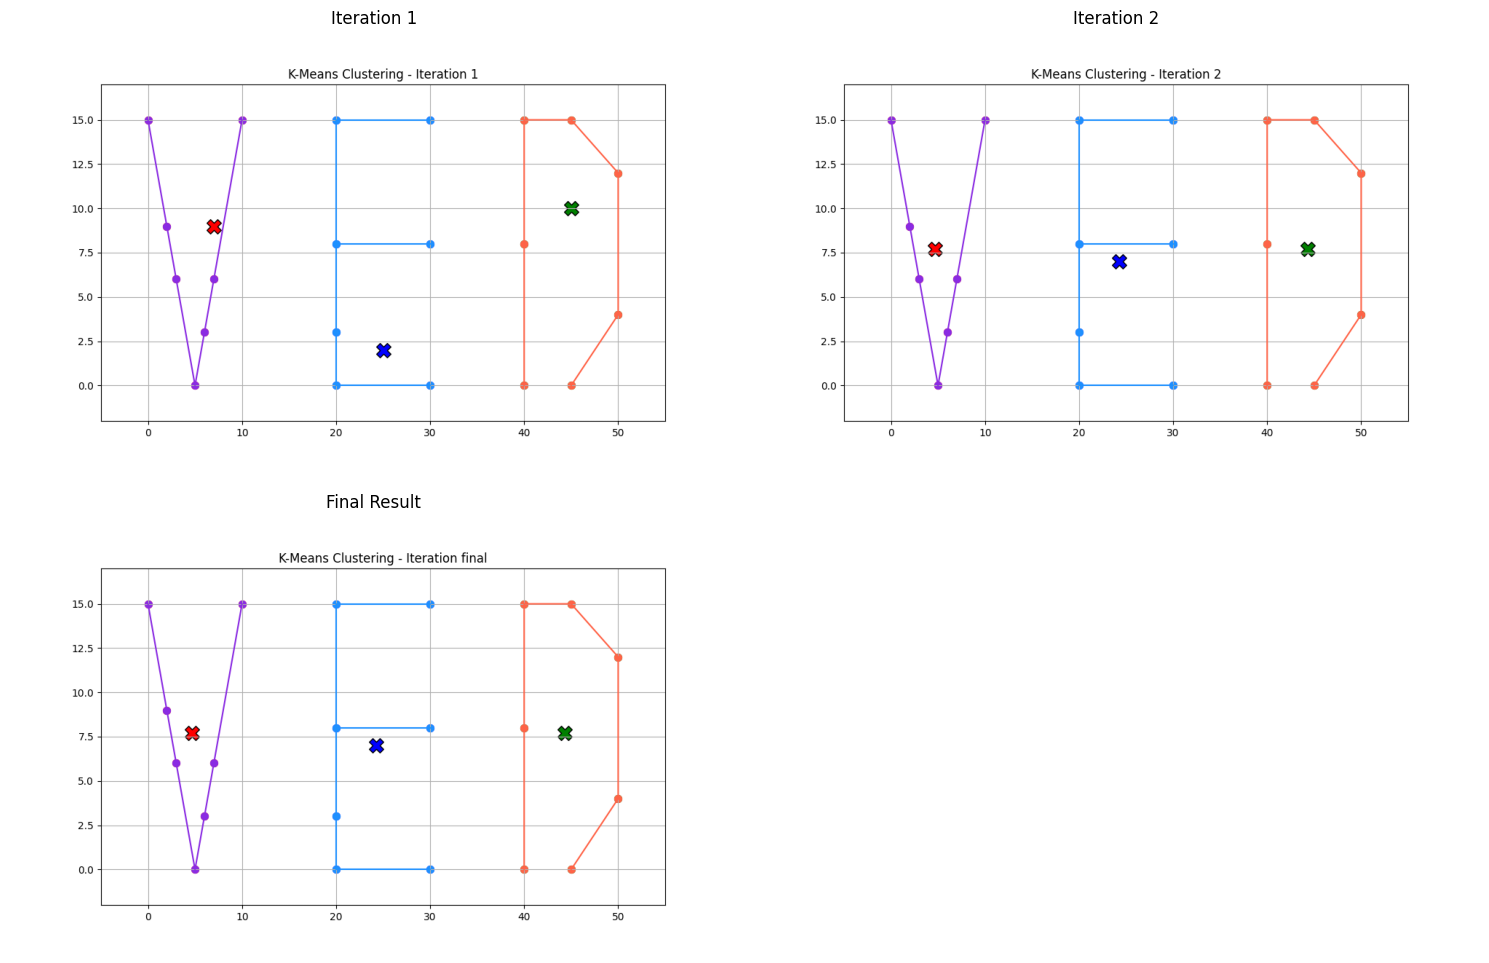

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from plotly.subplots import make_subplots
import random


V_cluster = [(0, 15), (5, 0), (10, 15), (6, 3), (7, 6), (3, 6), (2, 9)]
D_cluster = [(40, 0), (40, 8), (40, 15), (45, 15), (50, 12), (50, 4), (45, 0)]
E_cluster = [(20, 15), (30, 15), (20, 8), (30, 8), (20, 0), (30, 0), (20, 3)]



# I assumed the centroids from the any random points 
centroids = [(7, 9), (25, 2), (45, 10)]

def DistanceCal(point1, point2):
    return sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)
  
letters = {'V': V_cluster, 'E': E_cluster, 'D': D_cluster}
letter_colors = {'V': '#8A2BE2', 'E': '#1E90FF', 'D': '#FF6347'} 
all_points = V_cluster + E_cluster + D_cluster


def assign_to_clusters(points, centroids):
 
    clusters = [[] for _ in range(len(centroids))]
    assignments = []
    
    print("Point assignments:")
    for i, point in enumerate(points):
        # Calculate distance to each centroid
        distances = []
        for j, centroid in enumerate(centroids):
            dist = DistanceCal(point, centroid)
            distances.append(dist)
            print(f"Distance from point {point} to centroid {j+1} {centroid}: {dist:.4f}")
        
        # Find the closest centroid
        closest_centroid = distances.index(min(distances))
        assignments.append(closest_centroid)
        clusters[closest_centroid].append(point)
        print(f"Point {point} assigned to cluster {closest_centroid+1}")
        print()
    
    return clusters, assignments

def centriodUpdate(clusters):
    """Update centroids based on the mean of assigned points"""
    new_centroids = []
    print("Updating centroids:")
    
    for i, cluster in enumerate(clusters):
        if not cluster: 
            print(f"Cluster {i+1} is empty. Keeping the previous centroid.")
            new_centroids.append(centroids[i])
            continue
            
       
        x_sum = sum(point[0] for point in cluster)
        y_sum = sum(point[1] for point in cluster)
        
        x_mean = x_sum / len(cluster)
        y_mean = y_sum / len(cluster)
        
        print(f"Cluster {i+1} calculation:")
        print(f"  Points: {cluster}")
        print(f"  x_sum = {x_sum}, y_sum = {y_sum}")
        print(f"  x_mean = {x_sum} / {len(cluster)} = {x_mean:.4f}")
        print(f"  y_mean = {y_sum} / {len(cluster)} = {y_mean:.4f}")
        print(f"  New centroid: ({x_mean:.4f}, {y_mean:.4f})")
        
        new_centroids.append((x_mean, y_mean))
    
    return new_centroids

def centroids_converged(old_centroids, new_centroids, threshold=0.000001):
    """Check if centroids have converged"""
    if len(old_centroids) != len(new_centroids):
        return False
    
    total_distance = 0
    for old, new in zip(old_centroids, new_centroids):
        dist = DistanceCal(old, new)
        total_distance += dist
        
    print(f"Total centroid movement: {total_distance:.4f}")
    return total_distance < threshold

def plotClusters(points, assignments, centroids, iteration):
    colors = ['red', 'blue', 'green']
    plt.figure(figsize=(10, 6))
    for i, point in enumerate(points):
        cluster_idx = assignments[i]
        plt.scatter(point[0], point[1], color=colors[cluster_idx], s=50)
    for i, centroid in enumerate(centroids):
        plt.scatter(centroid[0], centroid[1], color=colors[i], 
                   marker='X', s=200, edgecolors='black')
    for letter, points in letters.items():
        x_coords = [point[0] for point in points]
        y_coords = [point[1] for point in points]
        plt.scatter(x_coords, y_coords, color=letter_colors[letter], s=50, label=f'{letter} Points')
        if letter == 'V':
            plt.plot([0, 5, 10], [15, 0, 15], color=letter_colors[letter], linestyle='-')
        elif letter == 'D':
            plt.plot([40, 40, 45, 50, 50, 45], [0, 15, 15, 12, 4, 0], color=letter_colors[letter], linestyle='-')
        elif letter == 'E':
            plt.plot([20, 30], [15, 15], color=letter_colors[letter], linestyle='-')
            plt.plot([20, 30], [8, 8], color=letter_colors[letter], linestyle='-')
            plt.plot([20, 30], [0, 0], color=letter_colors[letter], linestyle='-')
            plt.plot([20, 20], [15, 0], color=letter_colors[letter], linestyle='-')
    
    plt.title(f'K-Means Clustering - Iteration {iteration}')
    plt.xlim(-5, 55)
    plt.ylim(-2, 17)
    plt.grid(True)
    plt.savefig(f'iteration_{iteration}.png')
    plt.close()

import plotly.graph_objects as go


max_iterations = 10
iteration = 0
converged = False

print("Initial centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: {centroid}")
print("\n" + "="*50 + "\n")

while not converged and iteration < max_iterations:
    print(f"ITERATION {iteration+1}")
    print("="*50)
    
    # Assign points to clusters
    clusters, assignments = assign_to_clusters(all_points, centroids)
    
    # Plot current state
    plotClusters(all_points, assignments, centroids, iteration+1)
    
    # Update centroids
    print("\n")
    new_centroids = centriodUpdate(clusters)
    
    # Check for convergence
    print("\nChecking for convergence:")
    for i, (old, new) in enumerate(zip(centroids, new_centroids)):
        dist = calculate_distance(old, new)
        print(f"Centroid {i+1} moved from {old} to {new}, distance: {dist:.4f}")
    
    converged = centroids_converged(centroids, new_centroids)
    print(f"Converged: {converged}")
    
    # Update centroids for next iteration
    centroids = new_centroids
    
    iteration += 1
    print("\n" + "="*50 + "\n")

print("Final centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: {centroid}")

# Create final plot with matplotlib for saving iterations
clusters, assignments = assign_to_clusters(all_points, centroids)
plotClusters(all_points, assignments, centroids, "final")

# Create an interactive final plot with Plotly
fig = go.Figure()

# Plot points with hover text
colors = ['red', 'blue', 'green']
cluster_names = ['Cluster 1', 'Cluster 2', 'Cluster 3']

for i, point in enumerate(all_points):
    cluster_idx = assignments[i]
    # Find which letter the point belongs to
    point_letter = None
    for letter, points_list in letters.items():
        if point in points_list:
            point_letter = letter
            break
    
    hover_text = f"Point: ({point[0]}, {point[1]})<br>Cluster: {cluster_idx+1}<br>Letter: {point_letter}"
    
    fig.add_trace(go.Scatter(
        x=[point[0]], 
        y=[point[1]],
        mode='markers',
        marker=dict(color=colors[cluster_idx], size=10),
        name=f"{point} - {cluster_names[cluster_idx]}",
        text=hover_text,
        hoverinfo='text'
    ))

# Plot centroids
for i, centroid in enumerate(centroids):
    fig.add_trace(go.Scatter(
        x=[centroid[0]],
        y=[centroid[1]],
        mode='markers',
        marker=dict(color=colors[i], size=18, symbol='x', line=dict(color='black', width=2)),
        name=f"Centroid {i+1}: ({centroid[0]:.2f}, {centroid[1]:.2f})"
    ))

for letter, points_list in letters.items():
    x_coords = [point[0] for point in points_list]
    y_coords = [point[1] for point in points_list]
    
    if letter == 'V':
        fig.add_trace(go.Scatter(
            x=[0, 5, 10], 
            y=[15, 0, 15],
            mode='lines',
            line=dict(color=letter_colors[letter]),
            name=f'Letter {letter}'
        ))
    elif letter == 'D':
        fig.add_trace(go.Scatter(
            x=[40, 40, 45, 50, 50, 45, 40], 
            y=[0, 15, 15, 12, 4, 0, 0],
            mode='lines',
            line=dict(color=letter_colors[letter]),
            name=f'Letter {letter}'
        ))
    elif letter == 'E':
        # Vertical line
        fig.add_trace(go.Scatter(
            x=[20, 20], 
            y=[15, 0],
            mode='lines',
            line=dict(color=letter_colors[letter]),
            name=f'Letter {letter} vertical'
        ))
        # Horizontal lines
        for height in [15, 8, 0]:
            fig.add_trace(go.Scatter(
                x=[20, 30], 
                y=[height, height],
                mode='lines',
                line=dict(color=letter_colors[letter]),
                showlegend=False
            ))

fig.update_layout(
    title='K-Means Clustering - Final Result (Interactive)',
    xaxis=dict(range=[-5, 55]),
    yaxis=dict(range=[-2, 17]),
    height=800,
    width=1200,
    hovermode='closest',
    plot_bgcolor='rgba(240, 240, 240, 0.8)'
)

fig.write_html('interactive_final_plot.html')

plt.figure(figsize=(15, 10))
for i in range(iteration):
    plt.subplot(2, (iteration+1)//2 + (iteration+1)%2, i+1)
    img = plt.imread(f'iteration_{i+1}.png')
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Iteration {i+1}')

plt.subplot(2, (iteration+1)//2 + (iteration+1)%2, iteration+1)
img = plt.imread('iteration_final.png')
plt.imshow(img)
plt.axis('off')
plt.title('Final Result')

plt.tight_layout()
plt.savefig('final_iterations.png')

print("\nK-means clustering complete!")
print(f"Total iterations: {iteration}")
print("\nCluster 1 points:")
for point in clusters[0]:
    print(point)
print("\nCluster 2 points:")
for point in clusters[1]:
    print(point)
print("\nCluster 3 points:")
for point in clusters[2]:
    print(point)
print("\nInteractive plot saved as 'interactive_final_plot.html'")